In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [316]:
train = pd.read_csv('train_black.csv')
test = pd.read_csv('test_black.csv')

In [317]:
train.shape

(550068, 12)

In [318]:
test.shape

(233599, 11)

In [319]:
# train.columns

In [320]:
# test.columns

In [321]:
train['source'] = 'train'
# test['Purchase'] = 0
test['source'] = 'test'

In [322]:
# test.columns

In [323]:
data = pd.concat([train,test],ignore_index = True,sort = False)

In [324]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train


Text(0, 0.5, 'number of buyers')

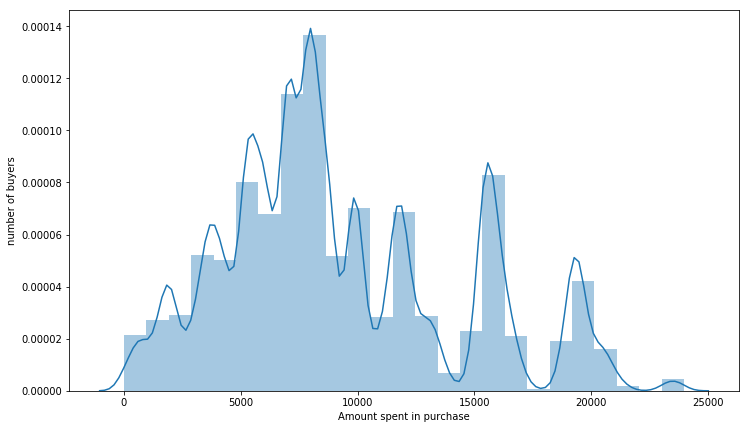

In [325]:
plt.figure(figsize = (12,7))
sns.distplot(train.Purchase,bins = 25)
plt.xlabel('Amount spent in purchase')
plt.ylabel('number of buyers')

In [326]:
train.Purchase.skew()

0.6001400037087128

In [327]:
train.Purchase.kurt()

-0.3383775655851702

In [328]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
source                        550068 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 54.6+ MB


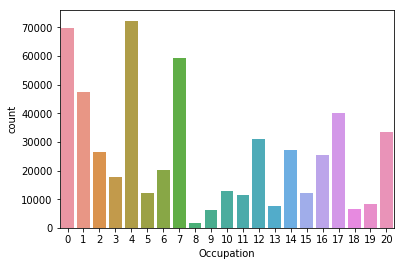

In [329]:
sns.countplot(train.Occupation)

In [330]:
# sns.countplot(train.Gender)

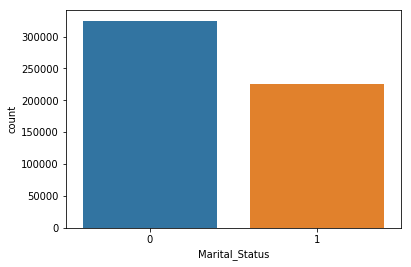

In [331]:
sns.countplot(train.Marital_Status)

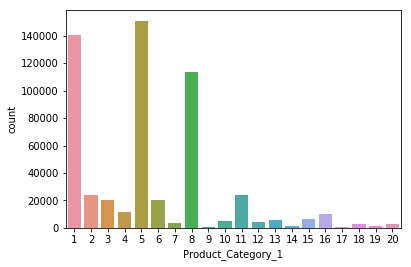

In [332]:
sns.countplot(train.Product_Category_1)

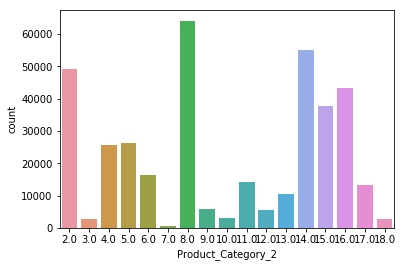

In [333]:
sns.countplot(train.Product_Category_2)

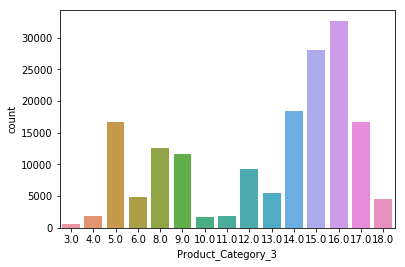

In [334]:
sns.countplot(train.Product_Category_3)

In [335]:
num_features = train.select_dtypes(include = [np.number])

In [336]:
corr = num_features.corr()
corr

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


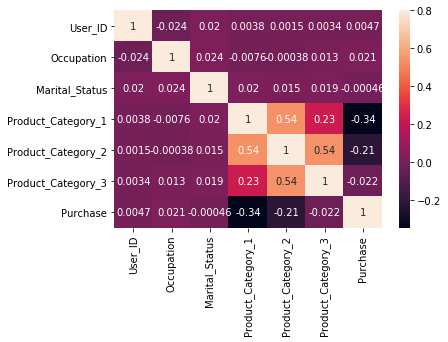

In [337]:
sns.heatmap(corr,vmax =0.8,annot = True)

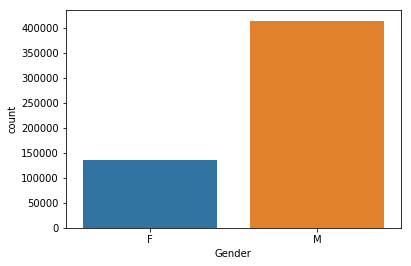

In [338]:
sns.countplot(train.Gender)

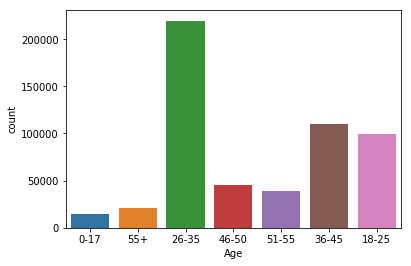

In [339]:
sns.countplot(train.Age)

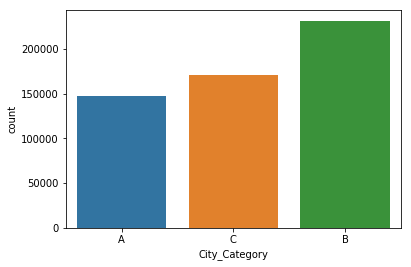

In [340]:
sns.countplot(train.City_Category)

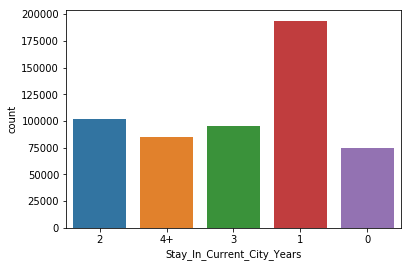

In [341]:
sns.countplot(train.Stay_In_Current_City_Years)

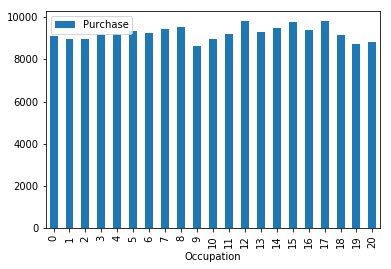

In [342]:
train.pivot_table(index = 'Occupation',values = 'Purchase',aggfunc = np.mean).plot(kind = 'bar')

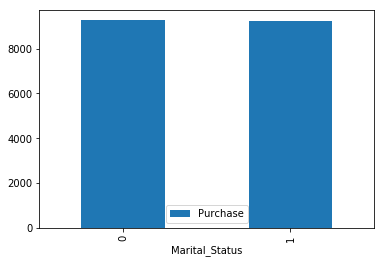

In [343]:
train.pivot_table(index = 'Marital_Status',values = 'Purchase',aggfunc = np.mean).plot(kind = 'bar')

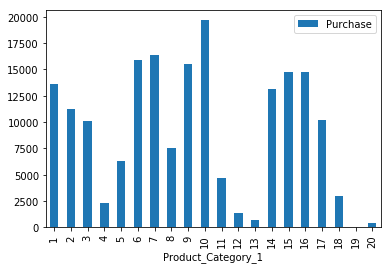

In [344]:
train.pivot_table(index = 'Product_Category_1',values = 'Purchase',aggfunc = np.mean).plot(kind = 'bar')

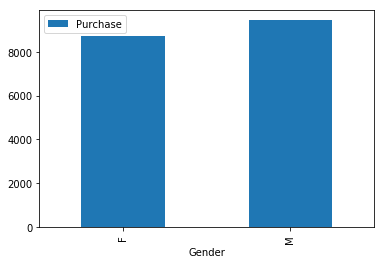

In [345]:
train.pivot_table(index = 'Gender',values = 'Purchase',aggfunc = np.mean).plot(kind = 'bar')

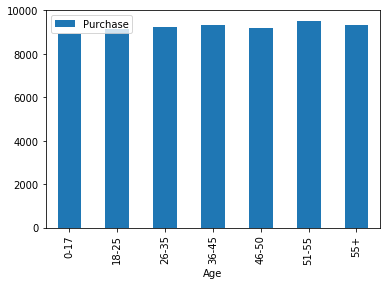

In [346]:
train.pivot_table(index = 'Age',values = 'Purchase',aggfunc = np.mean).plot(kind = 'bar')

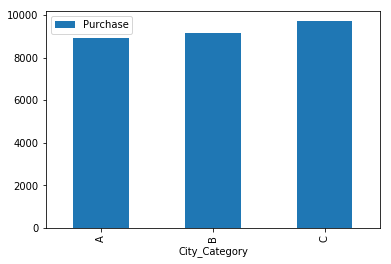

In [347]:
train.pivot_table(index = 'City_Category',values = 'Purchase',aggfunc = np.mean).plot(kind = 'bar')

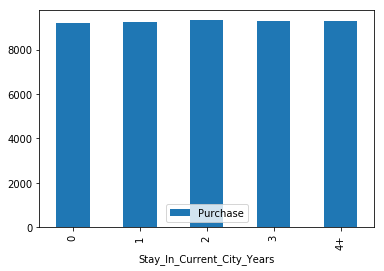

In [348]:
train.pivot_table(index = 'Stay_In_Current_City_Years',values = 'Purchase',aggfunc = np.mean).plot(kind = 'bar')

In [349]:
print(train.shape,test.shape,data.shape)

(550068, 13) (233599, 12) (783667, 13)


In [350]:
(data.isnull().sum()/data.shape[0])*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
source                         0.000000
dtype: float64

In [351]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'source'],
      dtype='object')

In [352]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(-2).astype(float)

In [353]:
# data['Product_Category_2'].value_counts()

In [354]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(-2).astype(float)

In [355]:
# data['Product_Category_3'].value_counts()

In [356]:
data.apply(lambda x:sum(x.isnull()))

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
source                             0
dtype: int64

In [357]:
cndn = data.index[(data['Product_Category_1'].isin([19,20])) & (data['source'] == 'train')]

In [358]:
data = data.drop(cndn)

In [359]:
data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3672
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17996
source                            2
dtype: int64

In [360]:
df = data.copy()

In [361]:
from sklearn.preprocessing import LabelEncoder

In [362]:
le = LabelEncoder()

In [363]:
# data['Product_ID'].value_counts()

In [364]:
clmn_to_label = ['Gender','Age','City_Category']

In [365]:
for i in clmn_to_label:
    df[i] = le.fit_transform(df[i])

In [366]:
df['Age'].value_counts()

2    311554
3    155898
1    141209
4     64902
5     54450
6     30316
0     21185
Name: Age, dtype: int64

In [367]:
df['City_Category'].value_counts()

1    328524
2    241487
0    209503
Name: City_Category, dtype: int64

In [368]:
df = pd.get_dummies(df,columns = ['Stay_In_Current_City_Years'])

In [369]:
df.dtypes

User_ID                            int64
Product_ID                        object
Gender                             int32
Age                                int32
Occupation                         int64
City_Category                      int32
Marital_Status                     int64
Product_Category_1                 int64
Product_Category_2               float64
Product_Category_3               float64
Purchase                         float64
source                            object
Stay_In_Current_City_Years_0       uint8
Stay_In_Current_City_Years_1       uint8
Stay_In_Current_City_Years_2       uint8
Stay_In_Current_City_Years_3       uint8
Stay_In_Current_City_Years_4+      uint8
dtype: object

In [370]:
# df

In [371]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source']=='test']

In [372]:
train.drop('source',axis = 1,inplace = True)

In [373]:
test.drop('source',axis = 1,inplace = True)

In [382]:
# test.head()
from sklearn import  metrics

In [381]:
from sklearn.linear_model import LinearRegression

In [386]:
# from sklearn import cross_validation

In [387]:
target = train['Purchase']

In [388]:
inputs = train.drop(['User_ID','Product_ID','Purchase'],axis = 1)

In [390]:
reg = LinearRegression()

In [391]:
reg.fit(inputs,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [392]:
train_predictions = reg.predict(inputs)

In [396]:
train_predictions

array([ 8446.1875  , 11286.109375,  5640.296875, ...,  7892.703125,
        8828.      , 11847.421875])

In [394]:
target

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
5         15227.0
6         19215.0
7         15854.0
8         15686.0
9          7871.0
10         5254.0
11         3957.0
12         6073.0
13        15665.0
14         5378.0
15         2079.0
16        13055.0
17         8851.0
18        11788.0
19        19614.0
20         8584.0
21         9872.0
22         9743.0
23         5982.0
24        11927.0
25        16662.0
26         5887.0
27         6973.0
28         5391.0
29        16352.0
           ...   
545885     3706.0
545886     5426.0
545887    11398.0
545888     2852.0
545889     7830.0
545890     7846.0
545891     9892.0
545892    11952.0
545893      959.0
545894     1787.0
545895     6857.0
545896    13054.0
545897     8810.0
545898     2153.0
545899     7006.0
545900     8889.0
545901     1434.0
545902     8047.0
545903     7796.0
545904    16493.0
545905     7058.0
545906     5948.0
545907     3425.0
545908    15694.0
545909    

In [400]:
from sklearn.tree import DecisionTreeRegressor

In [401]:
DT = DecisionTreeRegressor(max_depth = 15,min_samples_leaf = 100)

In [402]:
DT.fit(inputs,target)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [409]:
DT.score(inputs,target)

0.6576083736216205

In [410]:
RF = DecisionTreeRegressor(max_depth = 8,min_samples_leaf = 150)

In [411]:
RF.fit(inputs,target)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=150,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [412]:
RF.score(inputs,target)

0.6423138858944009